In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [19]:
multivariate_data=test_new.loc[500:24999,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']]
multivariate_data = multivariate_data.set_index('dateTime')
multivariate_data=multivariate_data.loc[::-1]

In [61]:
l=multivariate_data.columns
l=np.array(l)

m=test_new.loc[0:10,['dateTime',l[0]]]

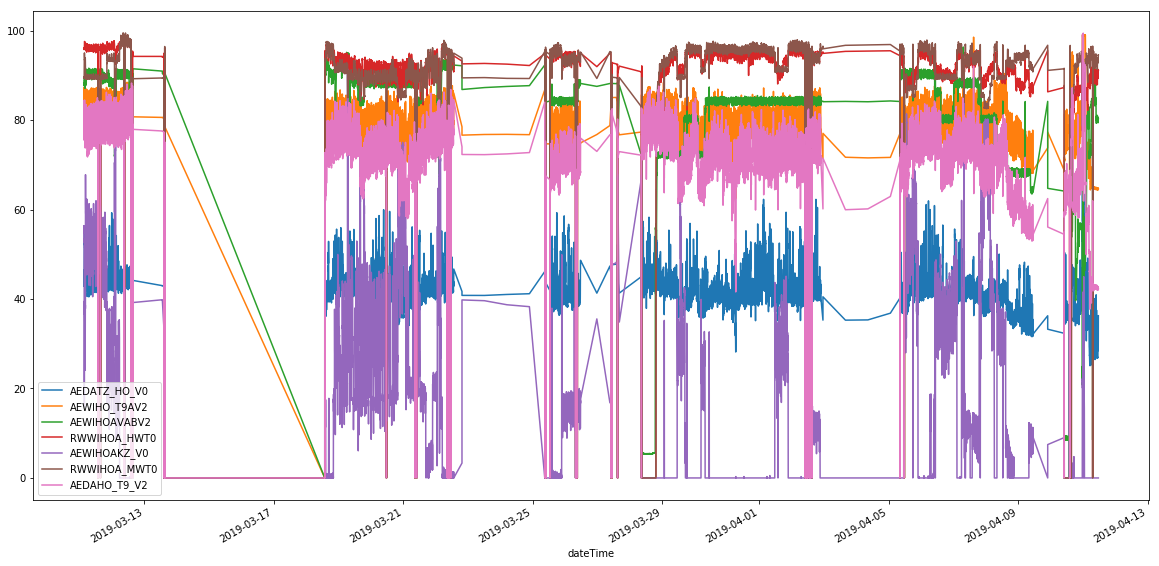

In [20]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [21]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
multi_mean=multivariate_data.mean()
multivariate_data_mean= multivariate_data.replace(0,multi_mean)

In [63]:
print(multi_mean)

AEDATZ_HO_V0    41.615423
AEWIHO_T9AV2    76.911482
AEWIHOAVABV2    79.975928
RWWIHOA_HWT0    88.588305
AEWIHOAKZ_V0    17.272872
RWWIHOA_MWT0    88.354415
AEDAHO_T9_V2    69.896877
dtype: float64


In [64]:
multi_median=multivariate_data.median()
print(multi_median)
multivariate_data_median= multivariate_data.replace(0,multi_median)

AEDATZ_HO_V0    41.088972
AEWIHO_T9AV2    76.825217
AEWIHOAVABV2    84.254694
RWWIHOA_HWT0    93.155966
AEWIHOAKZ_V0     7.700092
RWWIHOA_MWT0    93.022119
AEDAHO_T9_V2    70.707651
dtype: float64


In [23]:
# from numpy import nan
# multivariate_data_drop_zero= multivariate_data.replace(0,nan)
# multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

shape of multivariate_data:  (24500, 7)
shape of multivariate_data_drop_zero:  (24500, 7)


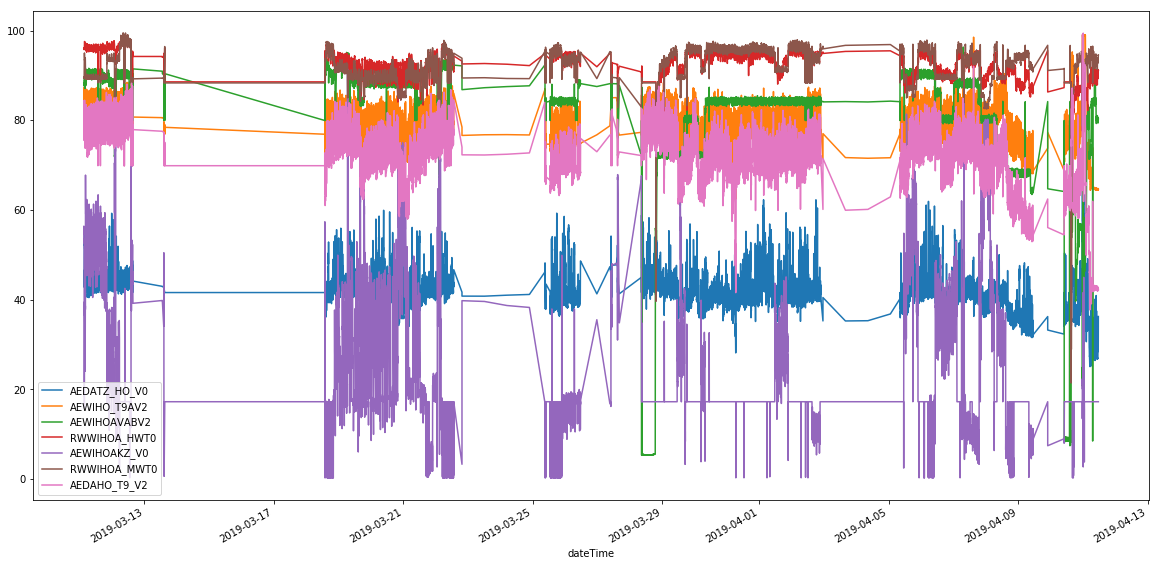

In [24]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_mean.shape)

multivariate_data_mean.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [25]:
# print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
# dataset=np.array(multivariate_data_drop_zero)
# # print(dataset)

In [65]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(multivariate_data_median)
col_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']
df_normalized = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=col_label)

In [66]:
dataset=np.array(df_normalized)
NumberOfElements=int(len(dataset)*0.8)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

multiple_ip_train_data=dataset[0:NumberOfElements]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
print(multiple_ip_test_set.shape)

Number of Elements for training:  19600
dataset length:  24500
(19600, 7)
(4900, 7)


In [67]:
from numpy import array
# from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
    
n_steps = 1
# convert into input/output
X_multiple_ip, y_multiple_ip = split_sequences(multiple_ip_train_data, n_steps)
print(X_multiple_ip.shape, y_multiple_ip.shape)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

(19600, 1, 6) (19600,)


In [68]:
n_features = X_multiple_ip.shape[2]
print(n_features)

6


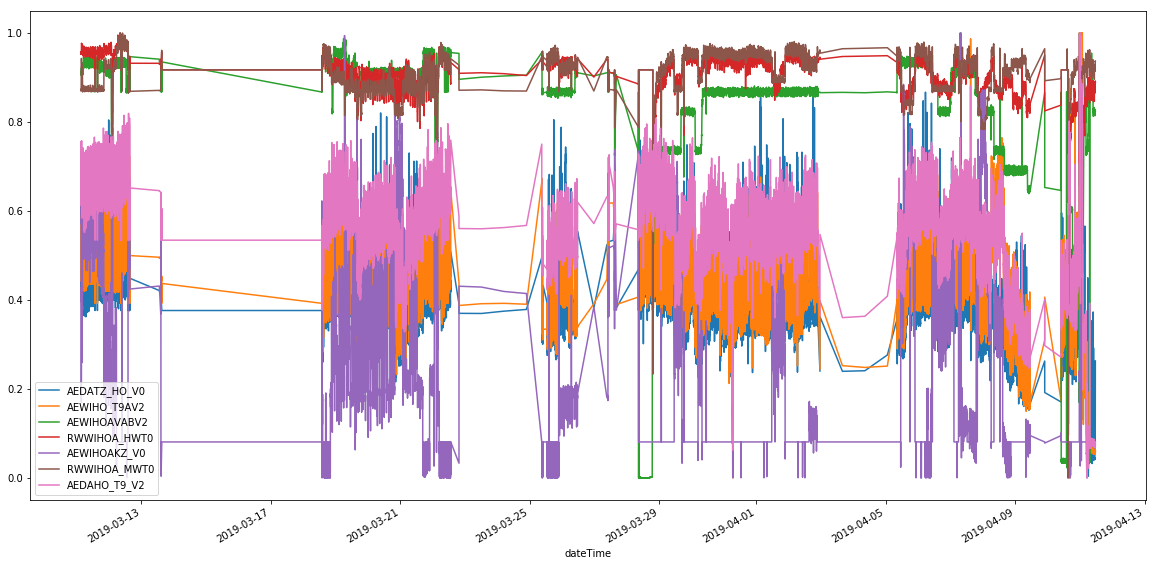

In [69]:
df_normalized.plot()
plt.show()

In [70]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import SGD

lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=30

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
train_model=model.fit(X_multiple_ip, y_multiple_ip, batch_size=batch_size, epochs=epochs, validation_split=0.2 ,verbose=1,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/multivariate_LSTM_norm_median_100.h5', 
                                     save_best_only=True)])

Train on 15680 samples, validate on 3920 samples
Epoch 1/30
15680/15680 [==============================] - 3s 182us/step - loss: 0.0071 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 2/30
15680/15680 [==============================] - 1s 66us/step - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 3/30
15680/15680 [==============================] - 1s 68us/step - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 4/30
15680/15680 [==============================] - 1s 70us/step - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 5/30
15680/15680 [==============================] - 1s 85us/step - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 6/30
15680/15680 [==============================] - 1s 76us/step - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 7/30
15680/15680 [==============================] - 1s 70us/step - loss: 0

In [72]:
X_multiple_test_ip, y_multiple_test_op = split_sequences(multiple_ip_test_set, n_steps)
print(X_multiple_test_ip.shape)
x_input = X_multiple_test_ip.reshape((X_multiple_test_ip.shape[0], n_steps, n_features))

(4900, 1, 6)


In [73]:
from keras.models import load_model

load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/multivariate_LSTM_norm_median_100.h5')

yhat = load_trained_model.predict(x_input, verbose=1)

4900/4900 [==============================] - 0s 89us/step


size of actual op:  4900
size of predicted op:  4900


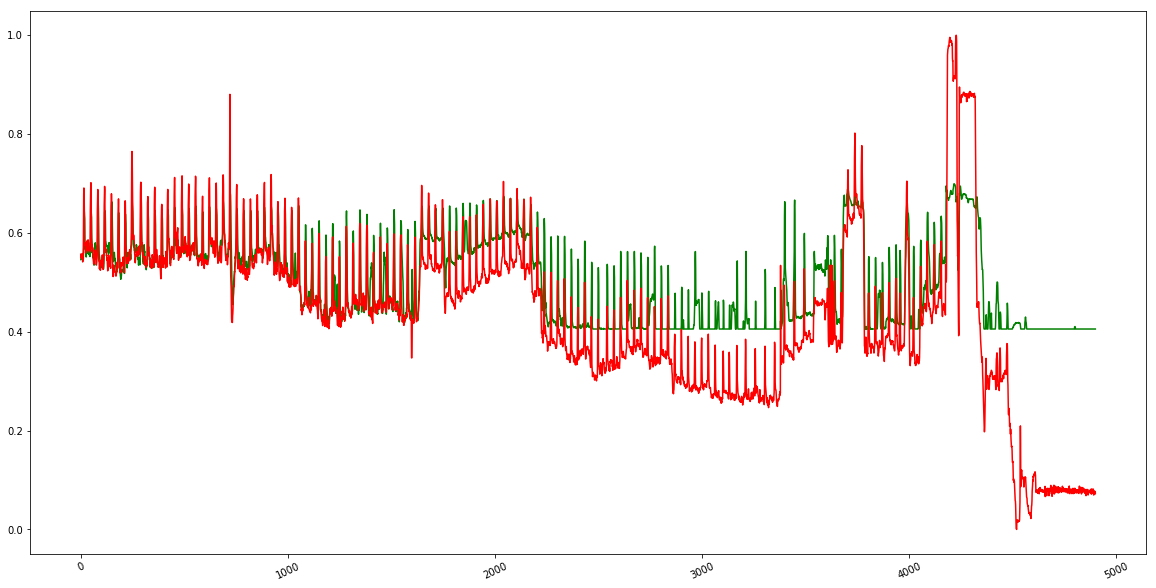

In [74]:
print('size of actual op: ',y_multiple_test_op.size)
print('size of predicted op: ',yhat.size)
plt.plot(yhat,color='green')
plt.plot(y_multiple_test_op,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [75]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(y_multiple_test_op,yhat)
print(Error)

0.0158869769080948


In [76]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_multiple_test_op,yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.126


# finding max value to perform unnormalization

In [77]:
# finding max value from each column
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_median.columns)):
    x=multivariate_data_median[val].max()
    q=[val,x]
    max_array.append(q)
target_column_max_value=max_array[-1][-1]
print(target_column_max_value)
unnormalized_yhat=yhat*target_column_max_value
unnormalized_y_Lstm_test=y_multiple_test_op*target_column_max_value

99.4516393320581


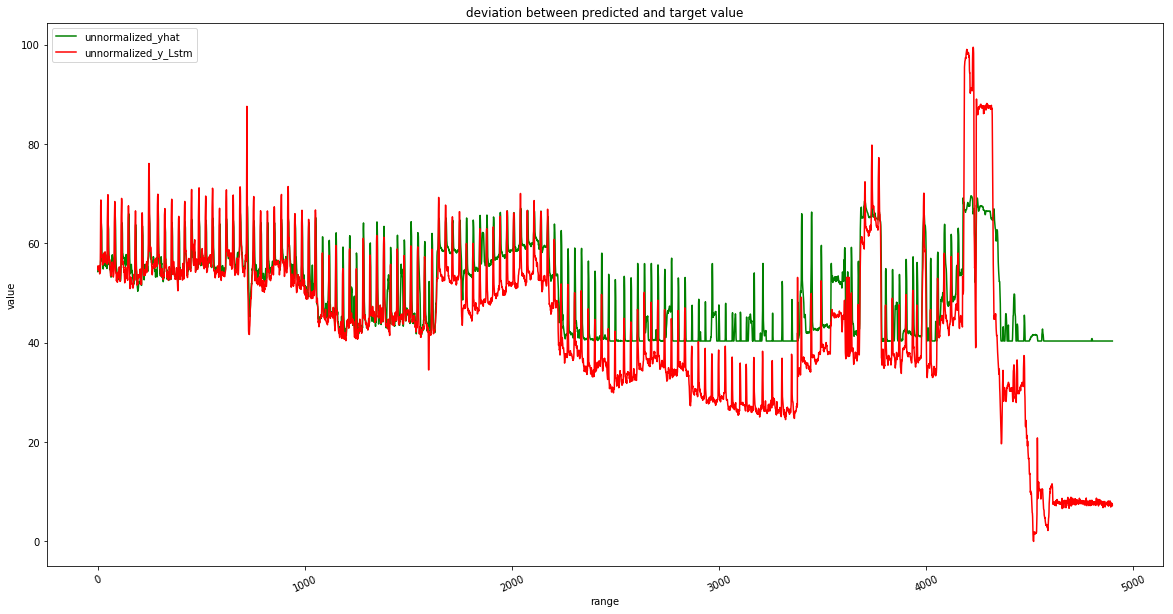

In [78]:
plt.plot(unnormalized_yhat,color='green')
plt.plot(unnormalized_y_Lstm_test,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['unnormalized_yhat', 'unnormalized_y_Lstm'], loc='upper left')
plt.show()

In [79]:
from math import sqrt
rmse = sqrt(mean_squared_error(unnormalized_y_Lstm_test,unnormalized_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 12.535


# making new test dataset

In [42]:
test_value=test_new.loc[24000:24050,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0',
                                     'RWWIHOA_MWT0','AEDAHO_T9_V2']]
test_value= test_value.set_index('dateTime')
test_value=test_value.loc[::-1]
test_value_array=np.array(test_value)
test_value_array=test_value_array[0:len(test_value_array)]

In [47]:
np_scaled = min_max_scaler.fit_transform(test_value_array)
# col_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']
df_normalized_new = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=col_label)

ValueError: Shape of passed values is (7, 51), indices imply (7, 24500)

In [43]:
x_test, y_test = split_sequences(test_value_array, n_steps)
print(x_test.shape)
x_input = x_test.reshape((x_test.shape[0], n_steps, n_features))

(51, 1, 6)


In [44]:
y_pred=model.predict(x_input)

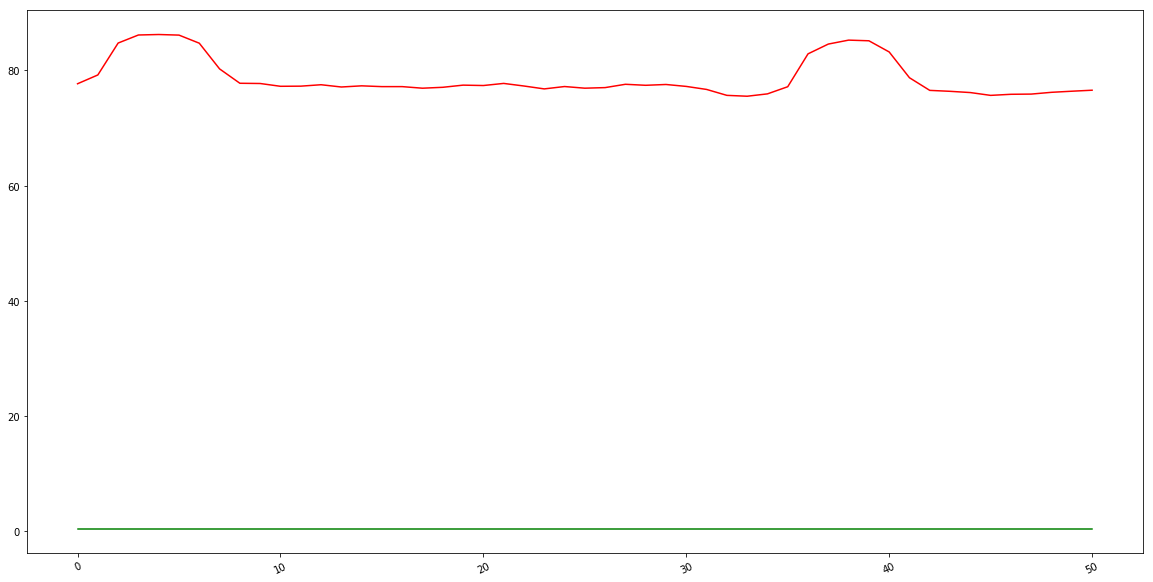

In [45]:
plt.plot(y_pred,color='green')
plt.plot(y_test,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(y_test,y_pred)
print(Error)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

6125.861292539749
78.26788161525613
